In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Visualization**
The basic objective in this code example is to understand how we can use seaborn pacakage to plot and visualize different real life datasets. We first just randomly declare and explore a dataset.
Then, we take two popular datasets from seaborn pacakge: "tips" and "fmri". Then, we explore them, plot them.
Reference: https://clauswilke.com/dataviz/

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

Let's take a random data in a variable "temperature_data" for a month and another related parameter with temperature_data: "y" for that month

In [9]:
# Randomly declared temperature_data and its corresponding y value
temperature_data = np.random.randint(25, 45, size=30)
y = temperature_data ** 3
print(f"temperature data: {temperature_data}")
print(f"temperature data squared: {y}")

# let's sort the temperature_data before plotting
temperature_data_sorted = temperature_data[np.argsort(temperature_data)]
y_sorted = y[np.argsort(temperature_data)]
print(f"sorted temperature data: {temperature_data_sorted}")
print(f"sorted temperature data squared: {y_sorted}")

temperature data: [32 42 39 40 30 28 42 44 37 25 42 39 33 41 43 31 34 26 28 44 30 41 25 37
 36 36 35 41 25 38]
temperature data squared: [32768 74088 59319 64000 27000 21952 74088 85184 50653 15625 74088 59319
 35937 68921 79507 29791 39304 17576 21952 85184 27000 68921 15625 50653
 46656 46656 42875 68921 15625 54872]
sorted temperature data: [25 25 25 26 28 28 30 30 31 32 33 34 35 36 36 37 37 38 39 39 40 41 41 41
 42 42 42 43 44 44]
sorted temperature data squared: [15625 15625 15625 17576 21952 21952 27000 27000 29791 32768 35937 39304
 42875 46656 46656 50653 50653 54872 59319 59319 64000 68921 68921 68921
 74088 74088 74088 79507 85184 85184]


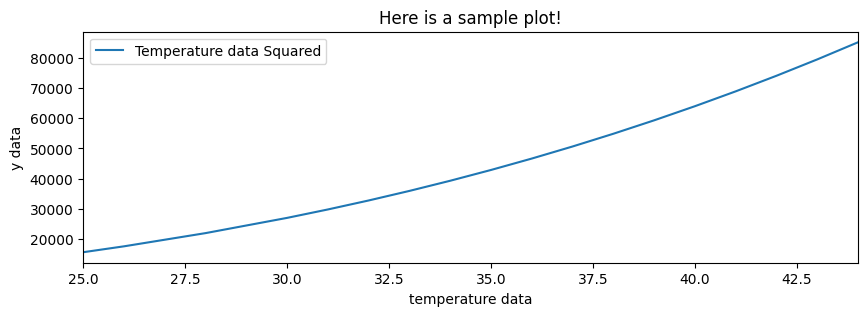

In [10]:
plt.figure(figsize=(10, 3))
plt.plot(temperature_data_sorted, y_sorted, label='Temperature data Squared') # curve name is given as temperature data squared...
plt.xlabel("temperature data")
plt.ylabel("y data")
plt.title("Here is a sample plot!")
plt.xlim([min(temperature_data), max(temperature_data)])
plt.legend()

plt.show()

Here, we shall now perform statistical data on these random variables (x, y) == (temperature_data, y)

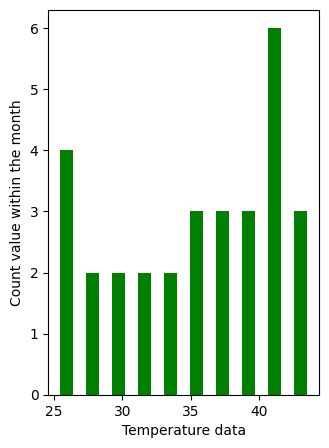

In [11]:
# Histogram data of the tempearature
plt.figure(figsize=(3.5,5))
plt.hist(temperature_data, rwidth=0.5, color='g')
plt.xlabel('Temperature data')
plt.ylabel('Count value within the month')
plt.show()

# **Seaborn (Used for Statistical Graphs)**

In [13]:
import seaborn as sns

# let's take a datasets from seaborn
data_tips = sns.load_dataset('tips')
print(data_tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


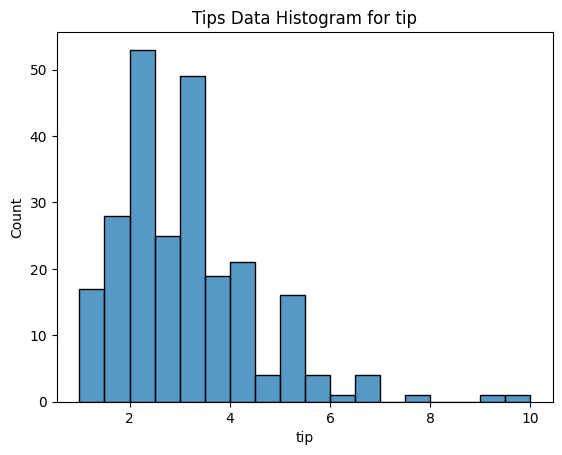

In [15]:
sns.histplot(data=data_tips, x='tip', legend=True)
plt.title('Tips Data Histogram for tip')
plt.show()

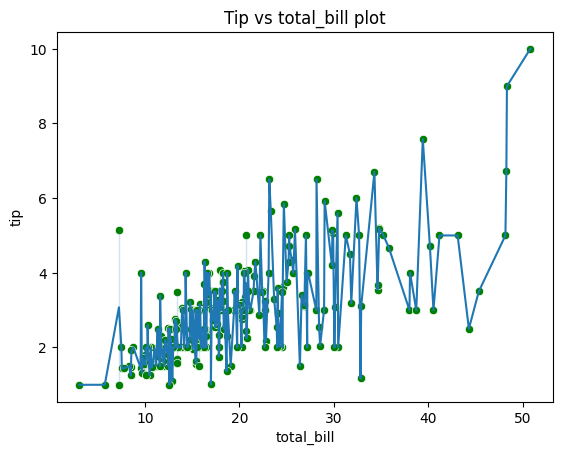

In [16]:
# Scatter plot using sns
sns.scatterplot(x='total_bill', y='tip', data=data_tips, color='g')
sns.lineplot(x='total_bill', y='tip', data=data_tips)
plt.title('Tip vs total_bill plot')
plt.show()

In [17]:
# Let's take another dataset

data_fmri = sns.load_dataset("fmri")
data_fmri_unique = data_fmri.drop_duplicates(subset='timepoint', keep='first')
data_fmri_unique

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
15,s13,17,stim,parietal,-0.008265
17,s7,9,stim,parietal,0.058897
29,s13,16,stim,parietal,-0.002856
43,s13,15,stim,parietal,-0.010971
67,s0,0,stim,frontal,-0.021452
71,s13,13,stim,parietal,-0.068637
85,s13,12,stim,parietal,-0.100984
99,s13,11,stim,parietal,-0.112575


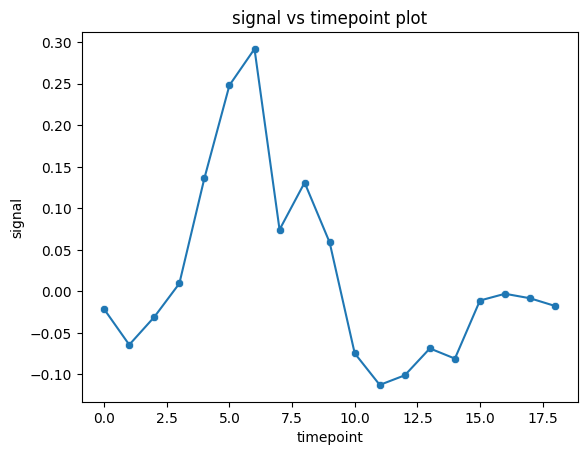

In [20]:
# More to explore.................
sns.scatterplot(x='timepoint', y='signal', data=data_fmri_unique)
sns.lineplot(x='timepoint', y='signal', data=data_fmri_unique, errorbar=None)
plt.title('signal vs timepoint plot')
plt.show()

In [27]:
# display(data_tips)
# display(data_fmri)
data_fmri_event = data_fmri['event']
data_fmri_event.unique()

array(['stim', 'cue'], dtype=object)

Now, we will plot more appropriately for the actual data while considering two different event--> stim and cue

In the plot, we will see dark colored lines for stim and cue events where faded colored intervals shall exist surrounding the dark colored lines.
Here, The dark lines represent the average signal intensity for each timepoint and event. Conversly, the faded lines around them show the range within which the true average signal intensity is likely to fall.

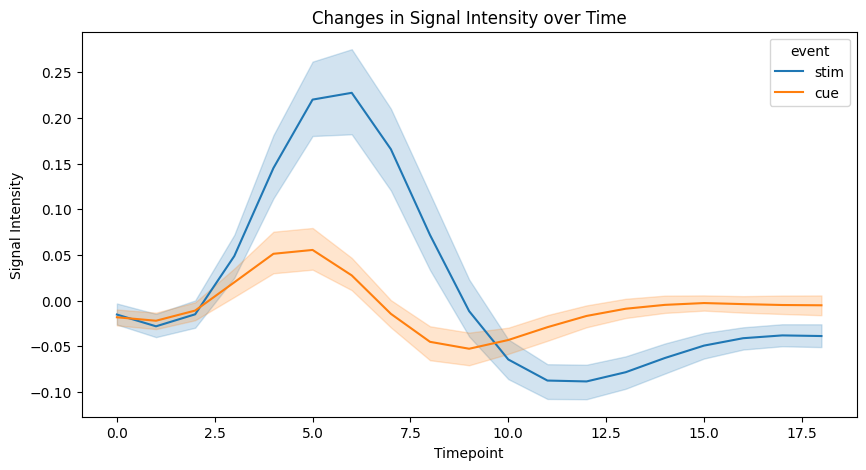

In [28]:
# Now plot more appropriately for the actual data while considering two different event--> stim and cue

plt.figure(figsize=(10, 5))

sns.lineplot(x='timepoint', y='signal', hue='event', data=data_fmri)
plt.xlabel('Timepoint')
plt.ylabel('Signal Intensity')
plt.title('Changes in Signal Intensity over Time')

plt.show()

# **More Data visualization technique/examples will be added here, stay tuned!!**